<a href="https://colab.research.google.com/github/Alvaromonterobec/heart-failure-prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
!pip install catboost
!pip install xgboost
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 2.7 MB/s eta 0:00:00


In [2]:
#https://www.kaggle.com/datasets/aadarshvelu/heart-failure-prediction-clinical-records/data descargar el dataset y cargarlo en files de Collab
encoding = "utf-8"
df = pd.read_csv("heart_failure_clinical_records.csv", encoding=encoding)
df.shape

(5000, 13)

##Análisis Exploratorio de Datos (EDA)

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None


In [6]:
missing_values = df.isnull().sum()
missing_values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Visualización de distribuciones

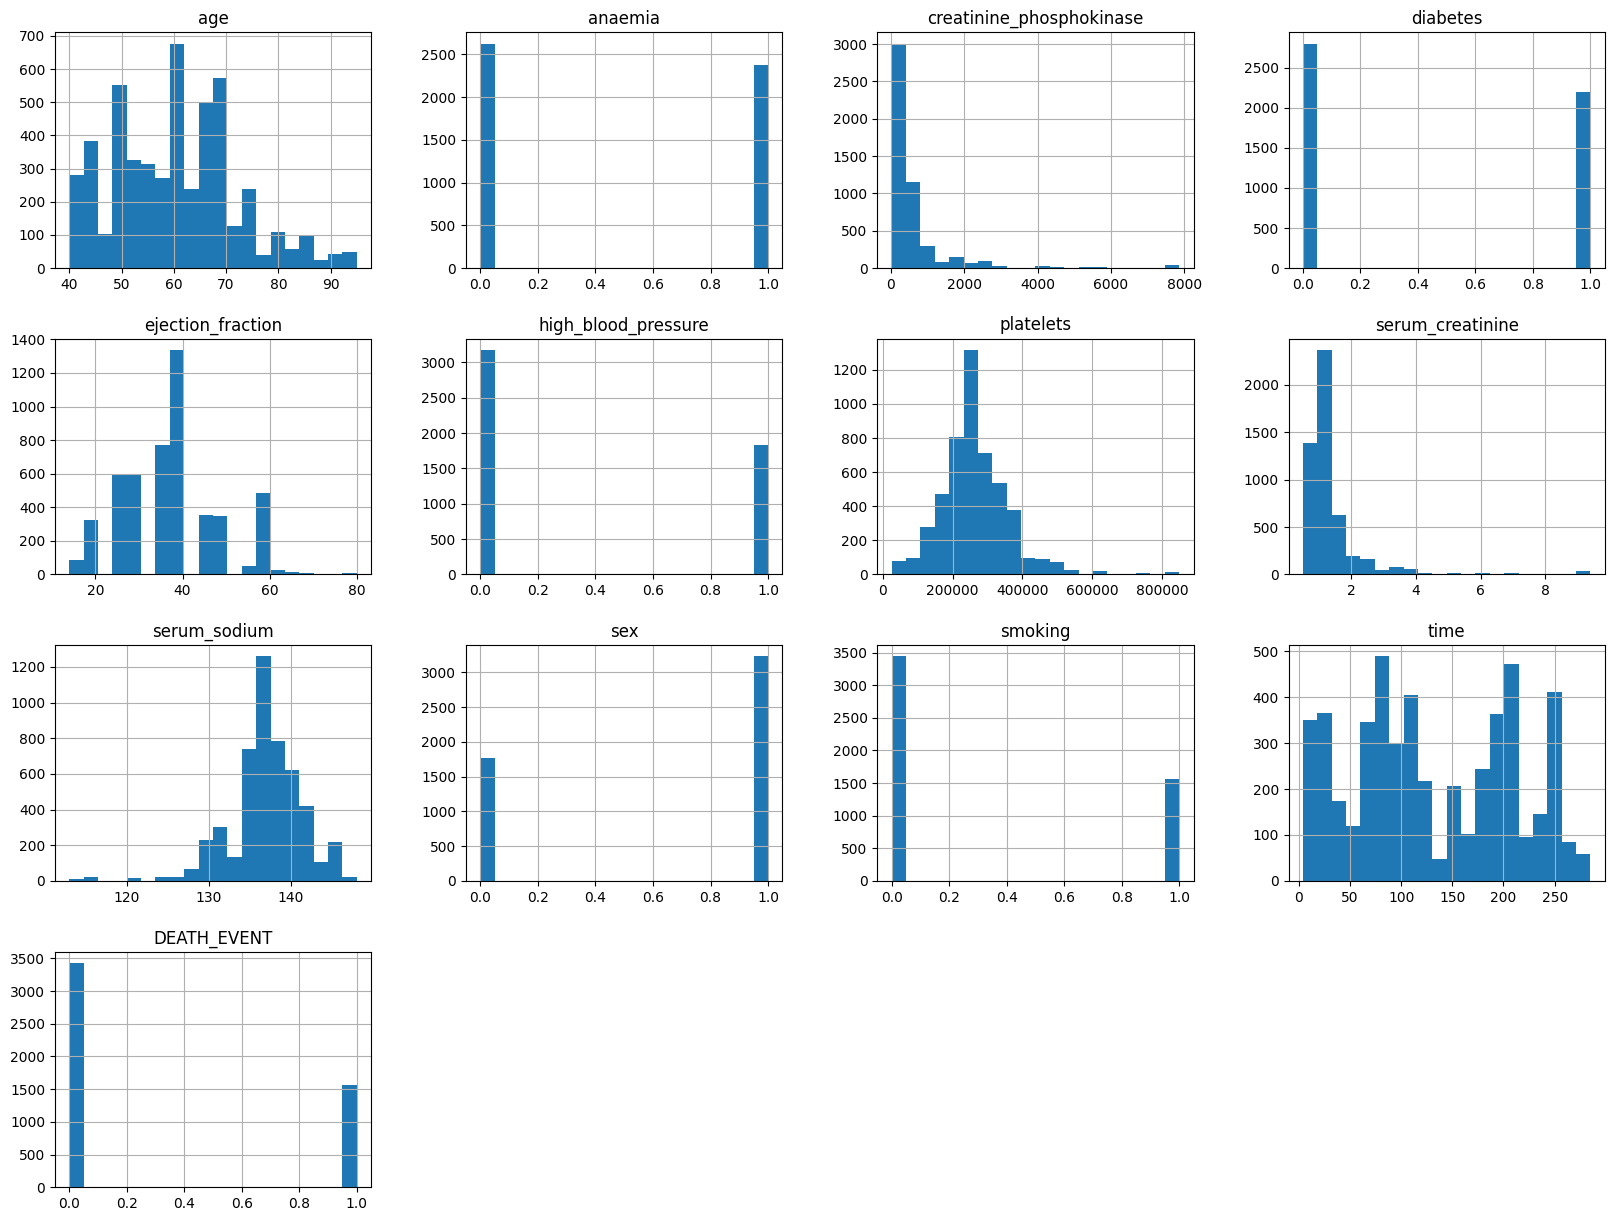

In [7]:
# Histogramas de todas las características
df.hist(bins=20, figsize=(20, 15))
plt.show()

In [8]:
cat_cols = ['sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']
num_cols = [c for c in df.columns if c not in cat_cols]


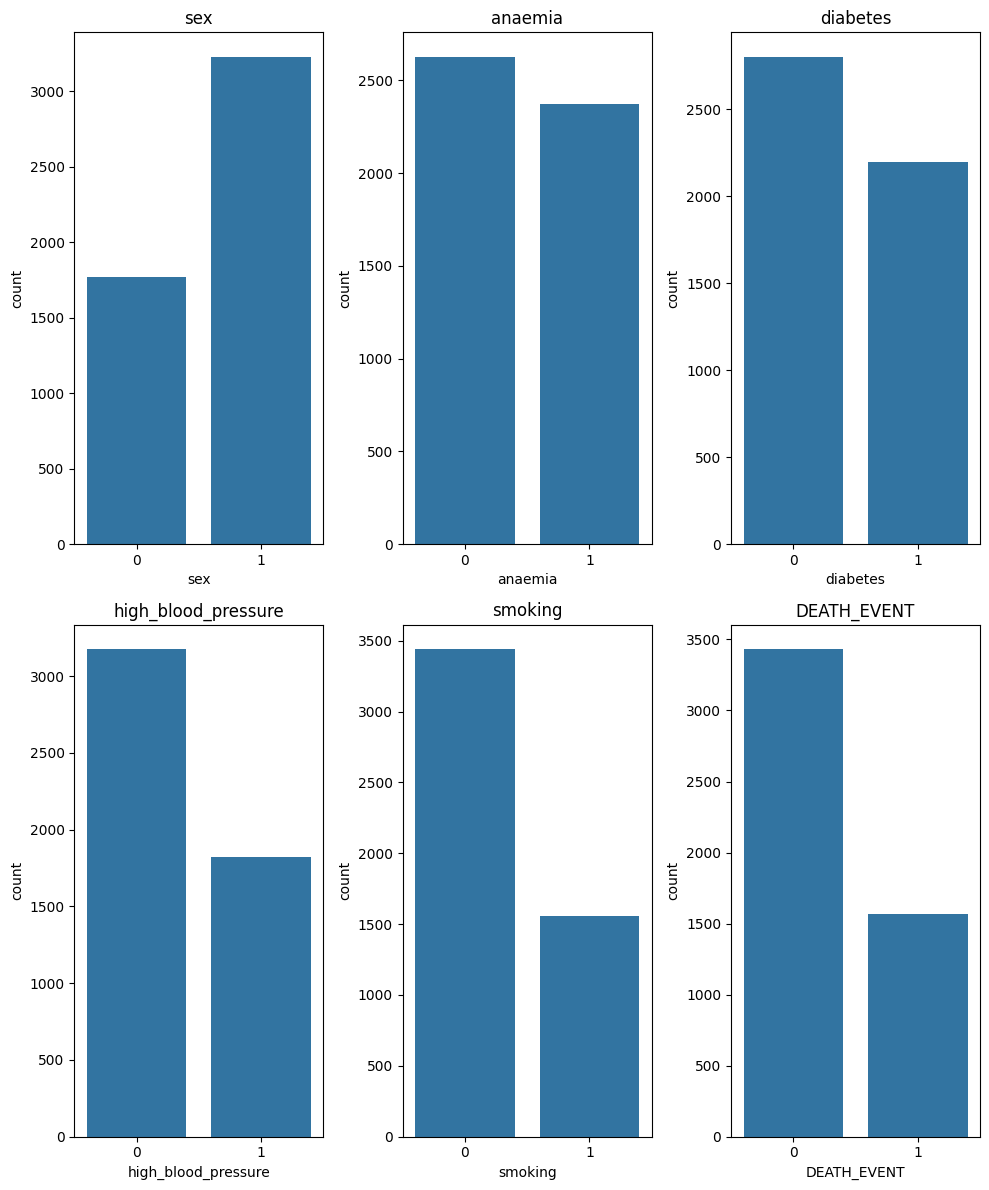

In [9]:
#Graficación de los plots de recuento de diferentes columnas categóricas usando seaborn

fig, axes = plt.subplots(2, 3, figsize = (10,12))
axes = axes.flatten()
for i, column in enumerate(cat_cols):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

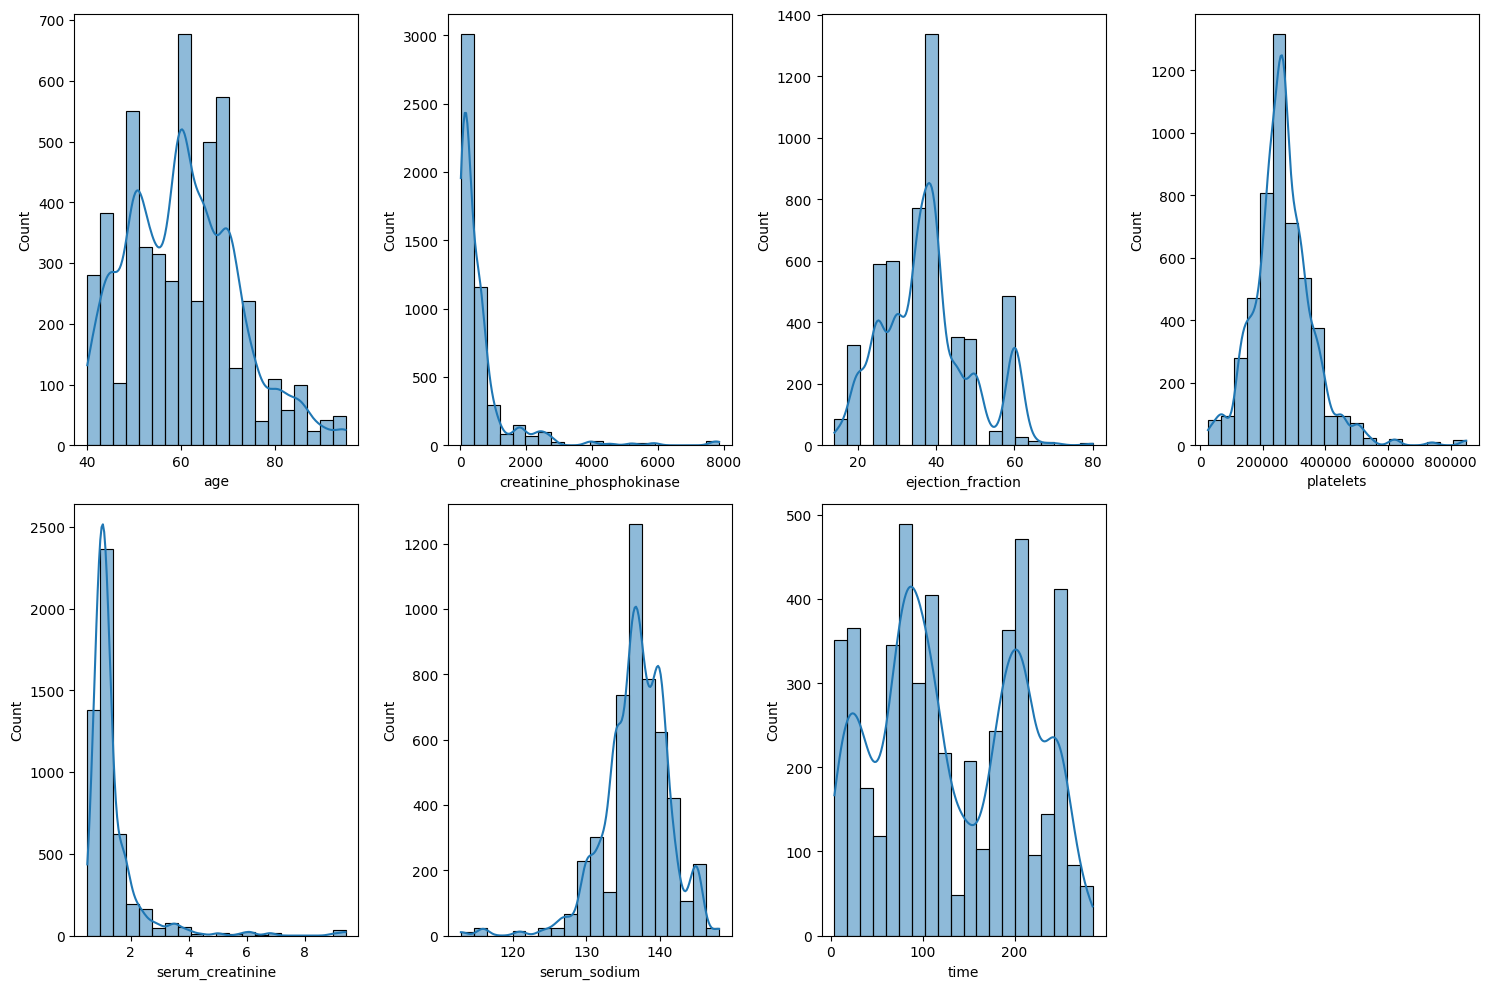

In [10]:
#Box plots para las columnas númericas

fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()
#Graficación de los histogramas con curvas KDE
for i, column in enumerate(num_cols):
    sns.histplot(df,x =  column, bins=20, kde=True, ax = axes[i])

for j in range(i + 1, len(axes)):
    plt.delaxes(axes[j])
plt.tight_layout()
plt.show()

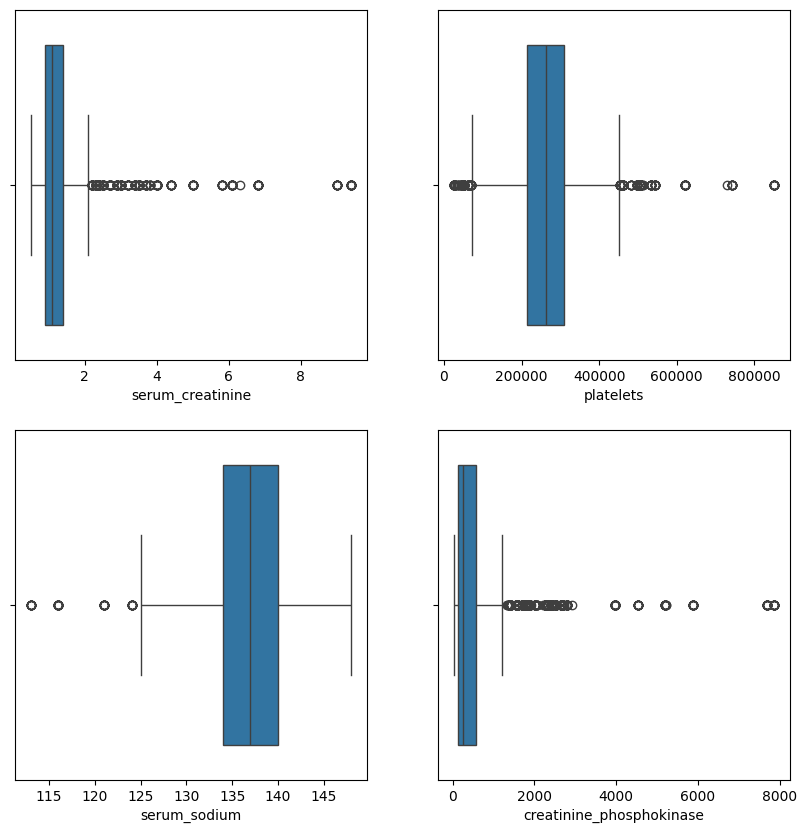

In [11]:
cols = ['serum_creatinine', 'platelets', 'serum_sodium', 'creatinine_phosphokinase']

fig, axes = plt.subplots(2, 2, figsize = (10, 10))

axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(df, x = col, ax = axes[i])

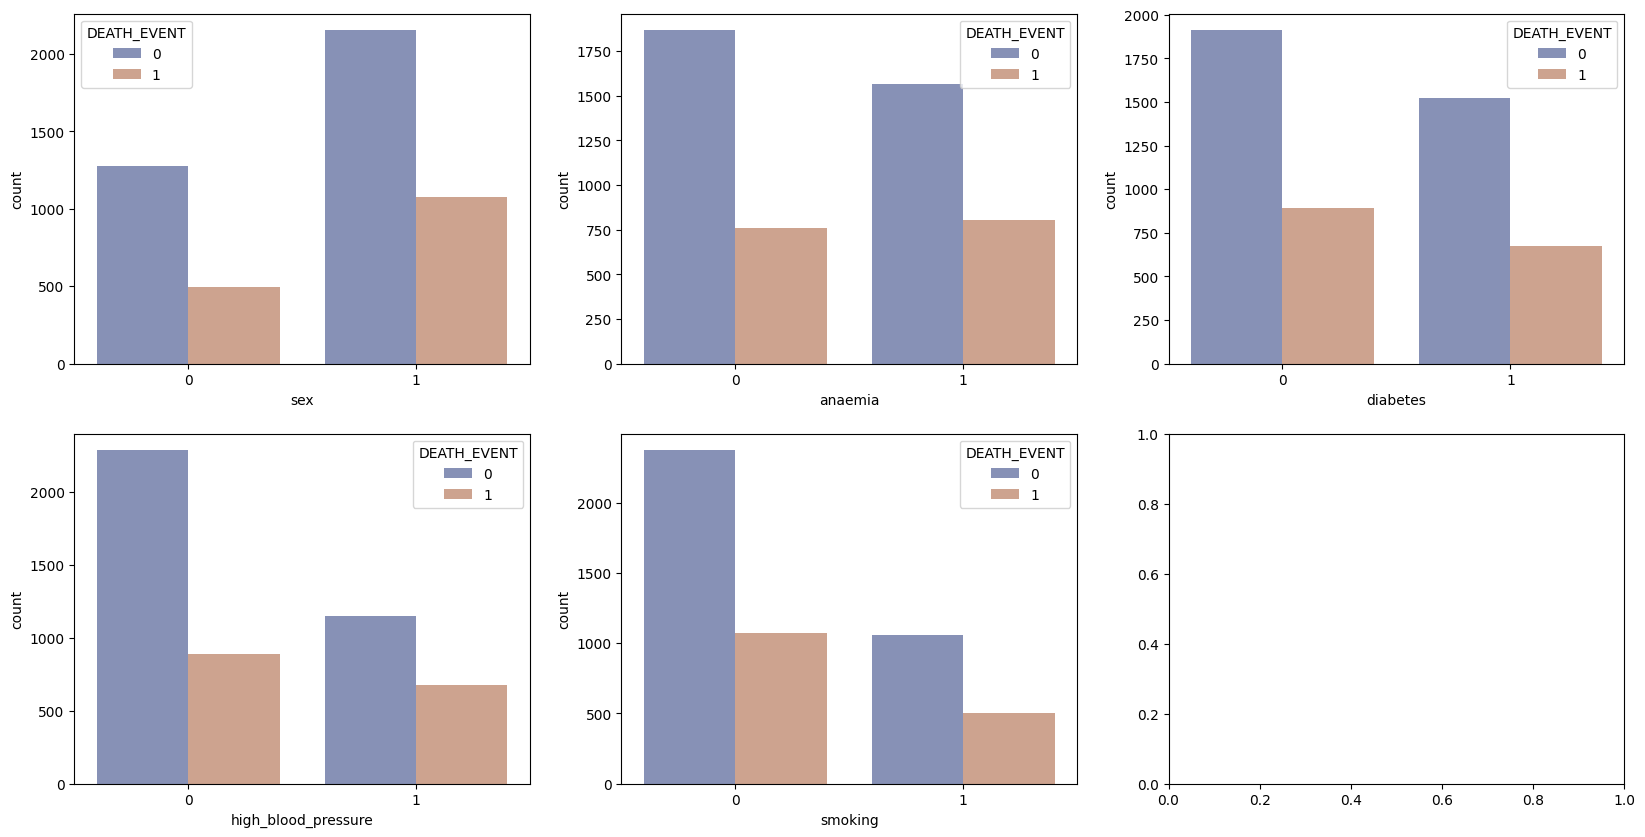

In [12]:
# Comparo las columnas categoricas con la columna más importante
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = axes.flatten()

for i, column in enumerate(cat_cols):
    if column !="DEATH_EVENT":
        sns.countplot(data=df, x=column, ax=axes[i], hue="DEATH_EVENT", palette="dark",  alpha=.5, linewidth=0, fill=True)

# Quito los plots no utilizados
for j in range(i+1, len(axes)):
    plt.delaxes(axes[j])

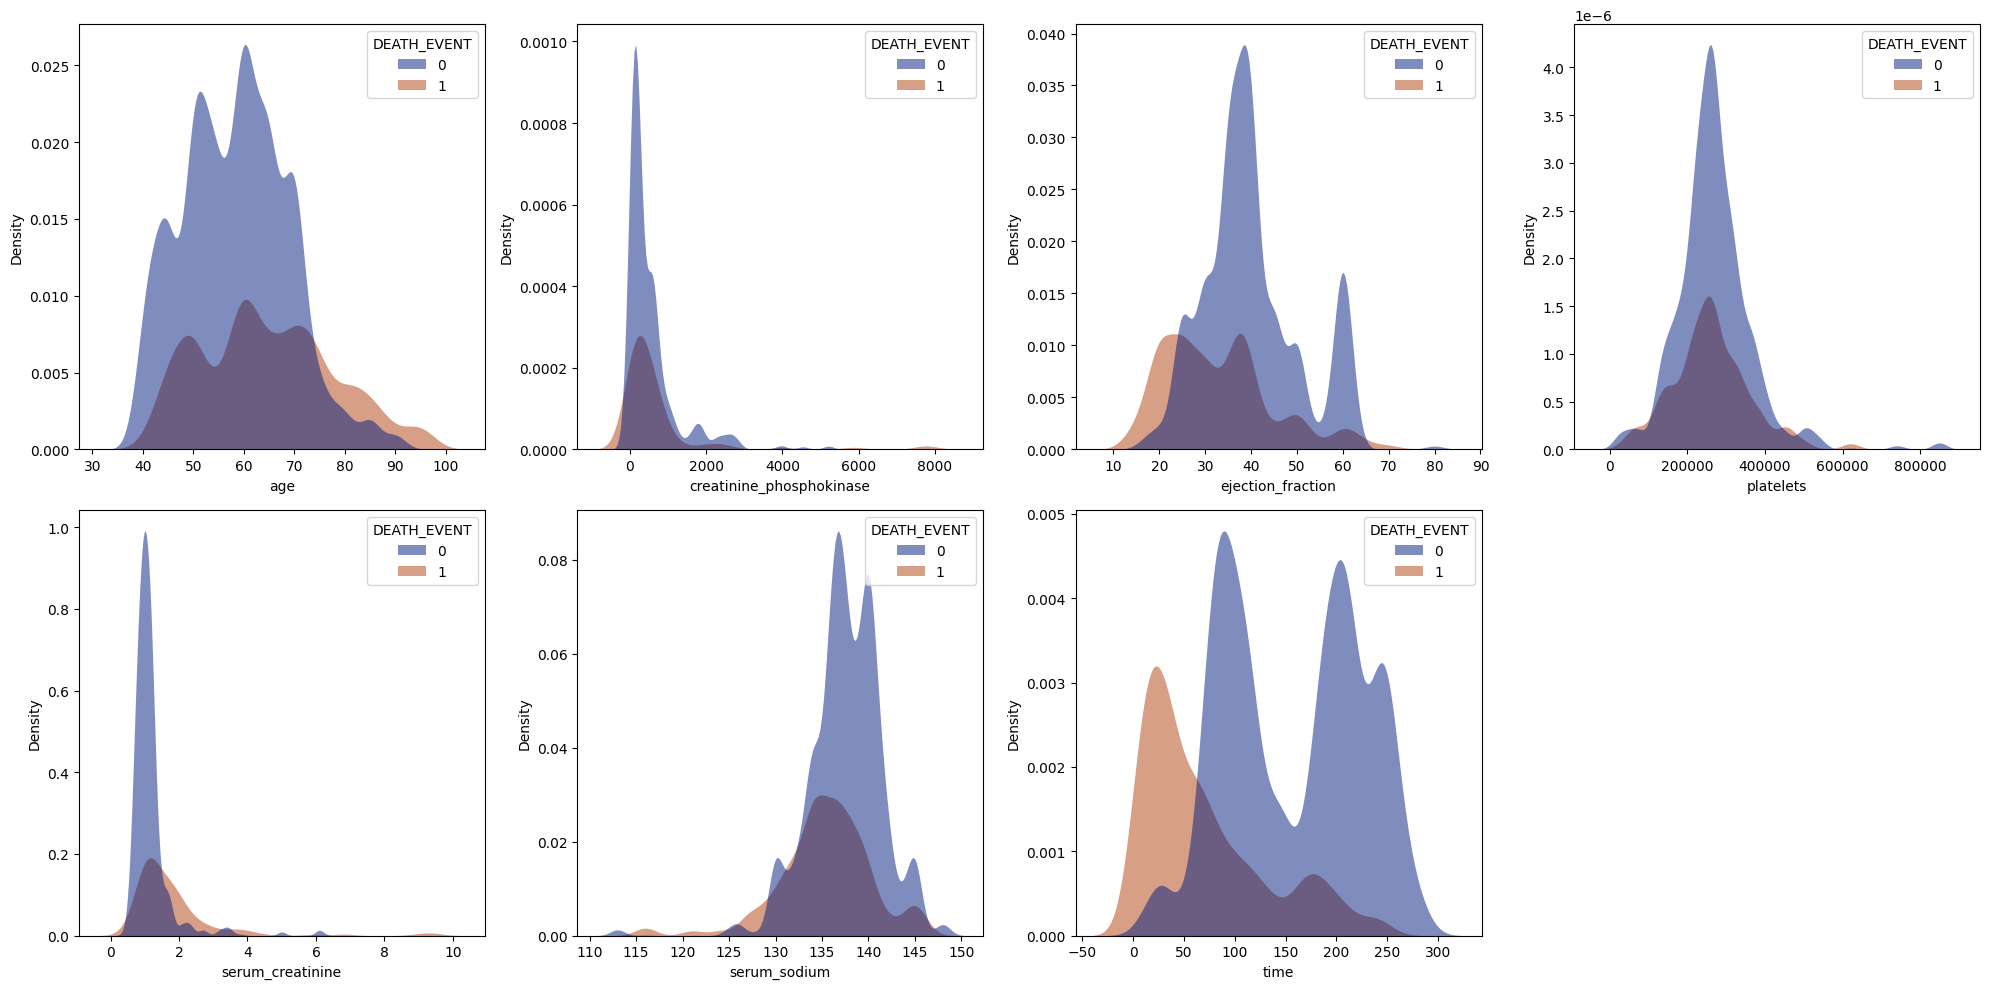

In [13]:
# Comparación de columnas númericas con la columna más importante
fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes = axes.flatten()
for i, column in enumerate(num_cols):
    sns.kdeplot(data=df, x=column, ax=axes[i], hue="DEATH_EVENT", palette="dark",  alpha=.5, linewidth=0, fill=True)

# Quito el subplot no utilizado
for j in range(i+1, len(axes)):
    plt.delaxes(axes[j])
plt.tight_layout()
plt.show()

Matriz de Correlación

In [14]:
corrmat = df.corr()
corrmat

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejection_fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
high_blood_pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serum_creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serum_sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


<Axes: >

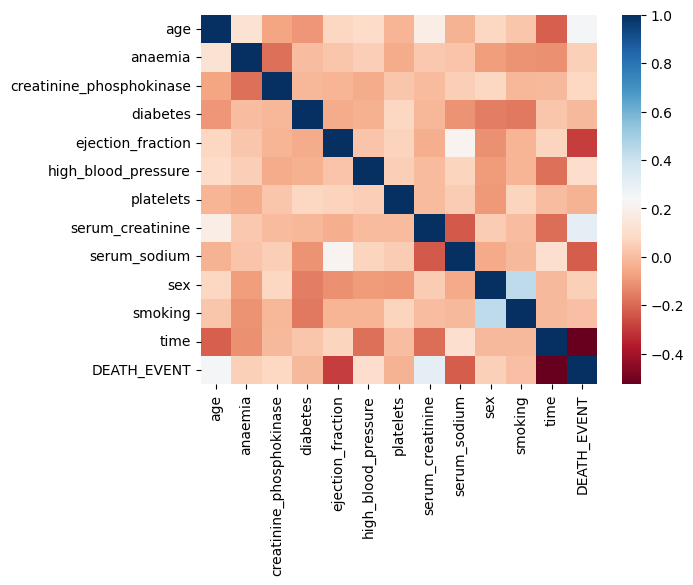

In [15]:
sns.heatmap(corrmat, cmap="RdBu")

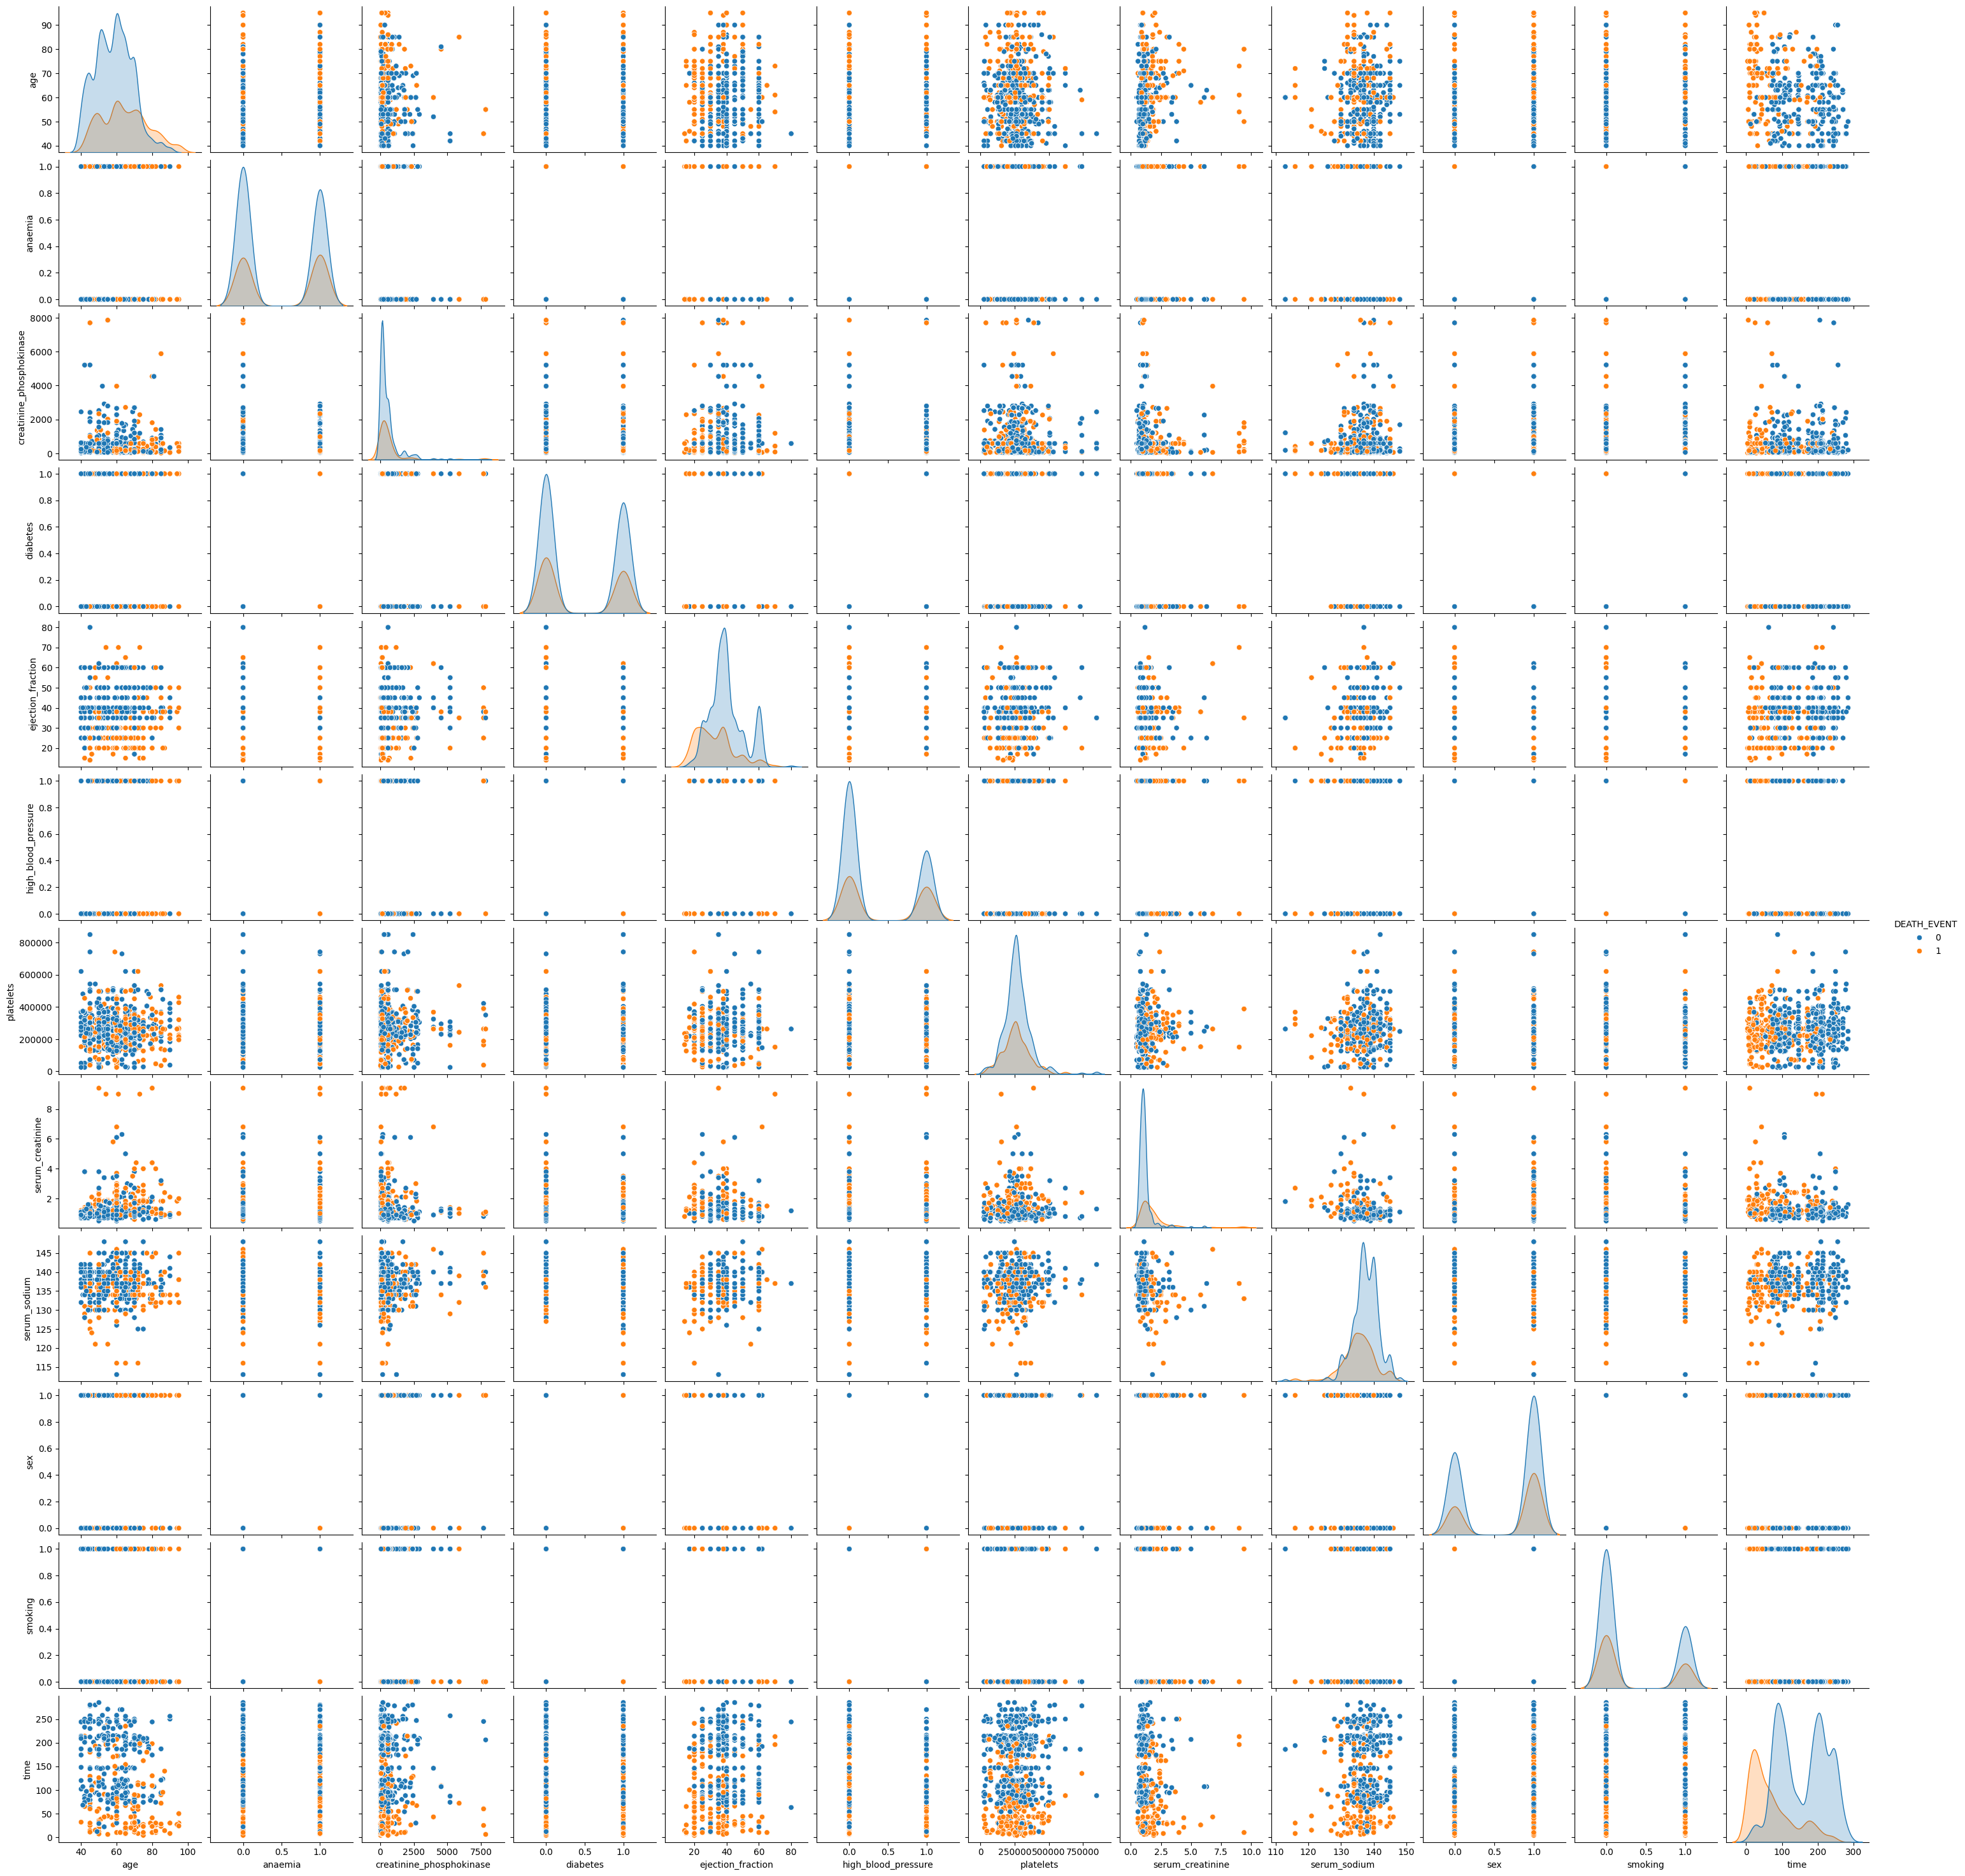

In [16]:

# Pair plot para ver relaciones entre múltiples características
sns.pairplot(df, hue='DEATH_EVENT')
plt.show()

#Análisis de Importancia de Características

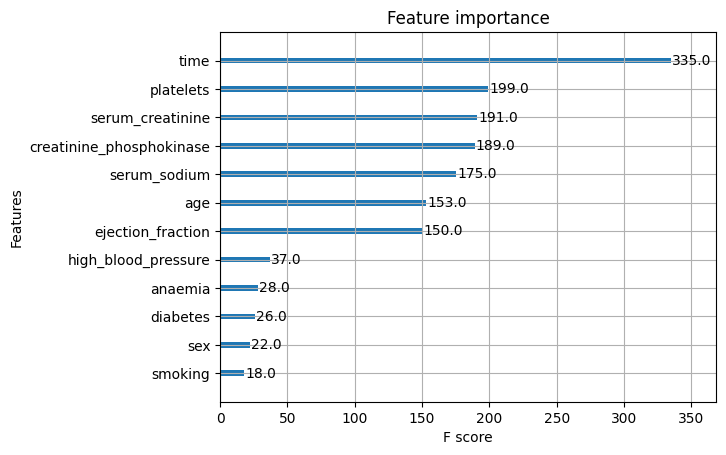

In [17]:
from xgboost import plot_importance

X = df.drop('DEATH_EVENT', axis=1)  # Features
y = df['DEATH_EVENT']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importancia de características usando XGBoost
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)

# Visualización de la importancia de las características
plot_importance(xgboost_model)
plt.show()

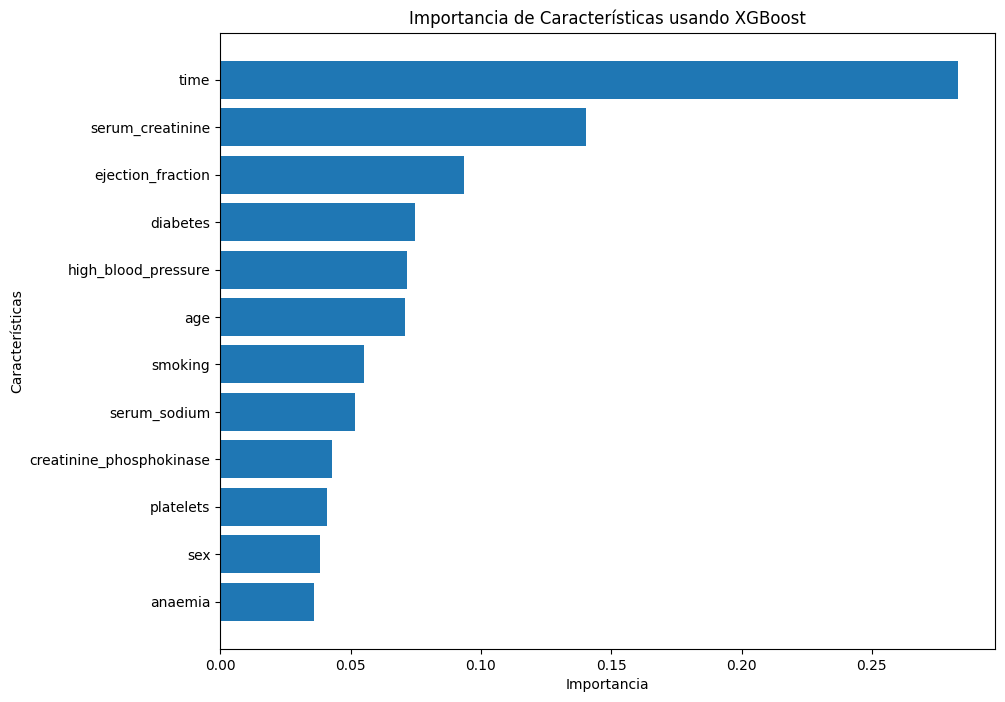

In [18]:
import xgboost as xgb

# Separar características y etiqueta
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo XGBoost
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

# Importancia de características
feature_importances = xgboost_model.feature_importances_
features = X.columns

# Crear un DataFrame con las importancias
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ordenar por importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de Características usando XGBoost')
plt.gca().invert_yaxis()
plt.show()

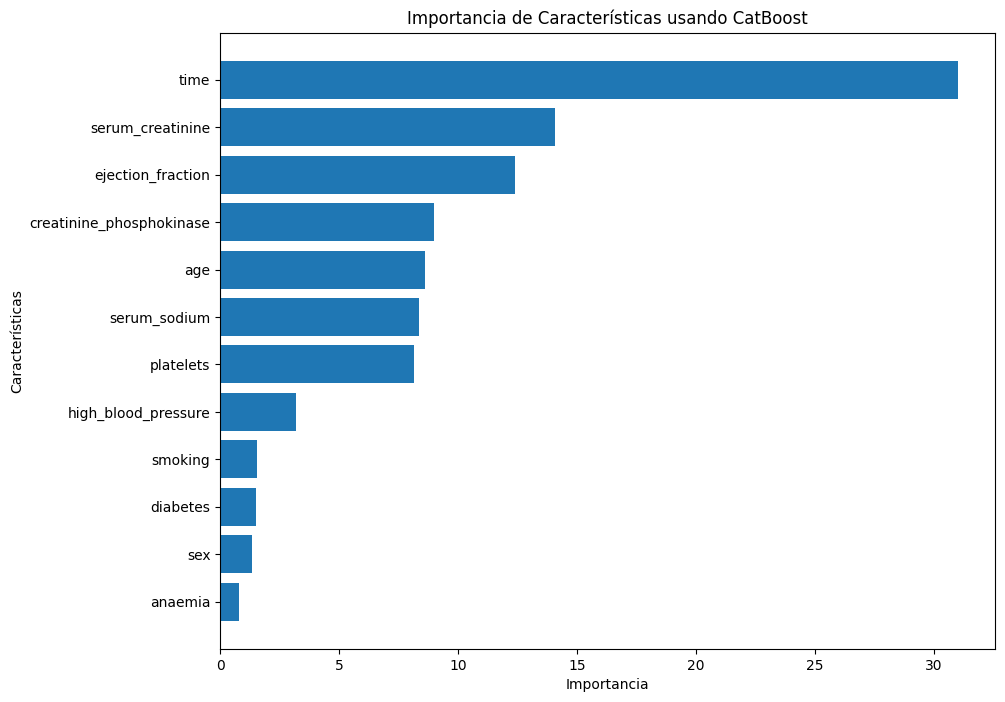

In [19]:
# Separar características y etiqueta
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo CatBoost
catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(X_train, y_train)

# Importancia de características
feature_importances = catboost_model.get_feature_importance()
features = X.columns

# Crear un DataFrame con las importancias
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ordenar por importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de Características usando CatBoost')
plt.gca().invert_yaxis()
plt.show()

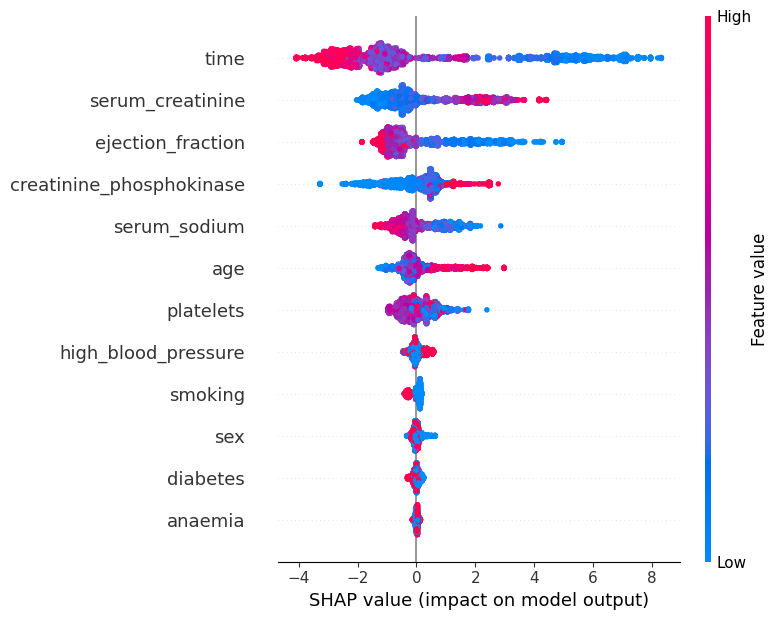

In [20]:
from catboost import CatBoostClassifier
# Crear el modelo CatBoost
catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(X_train, y_train)

# Calcular la importancia de las características
explainer = shap.Explainer(catboost_model)
shap_values = explainer(X)

# Resumen de la importancia de las características
shap.summary_plot(shap_values, X)

##Modelado

In [21]:
# split to train and test splits.

X = df.drop(['DEATH_EVENT'],  axis = 1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

voting_classifier = VotingClassifier(estimators=[(
    'cat', CatBoostClassifier(verbose=0)
), ('xg', XGBClassifier())
], voting="soft", verbose=False)

voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x78ffd31cc3d0>),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [22]:
y_pred = voting_classifier.predict(X_test)
print('Accuracy', accuracy_score(y_pred, y_test))

Accuracy 0.9886666666666667


In [23]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1043
           1       0.98      0.98      0.98       457

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



Validación cruzada

In [24]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con 5 folds
scores = cross_val_score(voting_classifier, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.966 0.998 0.999 0.999 1.   ]
Mean cross-validation score: 0.9924


Análisis de Error con matriz de confusión

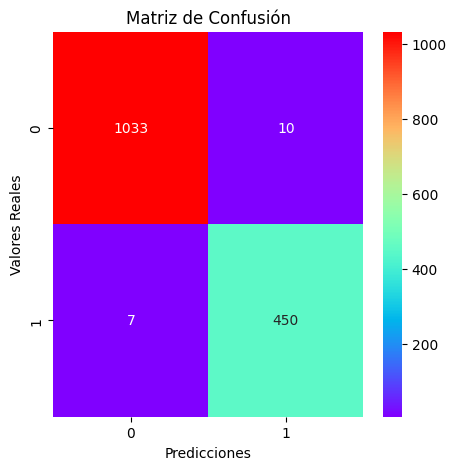

In [25]:
#Graficamos la matriz de confusión
plt.subplots(figsize = (5, 5))
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt='d', cmap='rainbow')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')

plt.show()

Optimización de Hiperparámetros

In [27]:
from sklearn.model_selection import GridSearchCV

# Parámetros a ajustar para CatBoostClassifier
param_grid_cat = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300]
}

# Parámetros a ajustar para XGBClassifier
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# GridSearchCV para CatBoostClassifier
grid_search_cat = GridSearchCV(estimator=CatBoostClassifier(verbose=0), param_grid=param_grid_cat, cv=5, scoring='accuracy')
grid_search_cat.fit(X_train, y_train)

# GridSearchCV para XGBClassifier
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

print("Best parameters for CatBoostClassifier:", grid_search_cat.best_params_)
print("Best parameters for XGBClassifier:", grid_search_xgb.best_params_)

Best parameters for CatBoostClassifier: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best parameters for XGBClassifier: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}


Analizamos con la Curva ROC

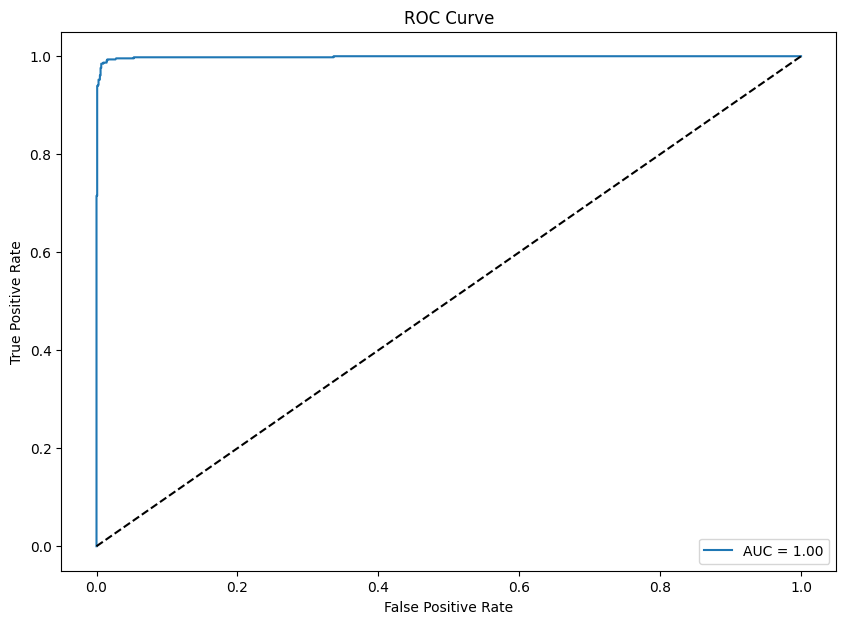

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener probabilidades de predicción
y_proba = voting_classifier.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Visualizar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [34]:
# Crear un df con las predicciones
predictions_df = pd.DataFrame({
    'ID': X_test.index,  # Usamos el índice de X_test como ID ya que no tenemos una columna específica para el ID
    'DEATH_EVENT': y_pred  # Las predicciones del modelo
})

# Guardar el df en un archivo CSV
predictions_df.to_csv('predicciones_death_event.csv', index=False)

# Descargar el archivo de predicciones del modelo
from google.colab import files
files.download('predicciones_death_event.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>